## Hello guys!! ✋
In this project we want to **predict house prices** in Tehran.
We use Python and Neural Networks for our project.
Let's do that. 🤩

We use the complete dataset for Tehran apartments. You can access it via the link below.:

https://github.com/mokar2001/House-Price-Tehran-Iran.git

# Dataset  
This dataset includes the following features:  

- Area in square meters  
- Number of rooms  
- Availability of parking lot  
- Availability of warehouse  
- Availability of elevator  
- Area and approximate address of the apartment  
- Price in Tomans (with the dollar valued at 30,000 tomans)

In [1]:
# Let's import the necessary library
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# read dataset file

houses_dataset = pd.read_csv('https://raw.githubusercontent.com/mokar2001/House-Price-Tehran-Iran/main/HousePrice.csv')
houses_dataset

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3260,63,1,True,True,False,Feiz Garden,1.890000e+09,63000.00
3261,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3262,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3263,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [3]:
# normilize the data
X = houses_dataset.drop(['Price','Price(USD)'],axis=1)
y = houses_dataset['Price']

In [4]:
X.head()

,Area,Room,Parking,Warehouse,Elevator,Address
0,63,1,True,True,True,Shahran
1,60,1,True,True,True,Shahran
2,79,2,True,True,True,Pardis
3,95,2,True,True,True,Shahrake Qods
4,123,2,True,True,True,Shahrake Gharb


In [5]:
y.head()

0    1.850000e+09
1    1.850000e+09
2    5.500000e+08
3    9.025000e+08
4    7.000000e+09
Name: Price, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)
len(X) , len(X_train) , len(X_test)

(3265, 3101, 164)

In [7]:
ct = make_column_transformer(
    (MinMaxScaler(),['Area','Room']),
    (OneHotEncoder(handle_unknown='ignore'),['Parking','Warehouse','Elevator','Address'])
)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [8]:
X_train.loc[0]

Area              63
Room               1
Parking         True
Warehouse       True
Elevator        True
Address      Shahran
Name: 0, dtype: object

In [9]:
X_train_normal.shape

(3101, 198)

In [21]:
# Now, we will create our neural network model.

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(199,activation='relu'),

    tf.keras.layers.Dense(199,activation='relu'),
    tf.keras.layers.Dense(199,activation='relu'),
    tf.keras.layers.Dense(199,activation='relu'),

    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005),
              loss = tf.keras.losses.mae,
              metrics = ['mae'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5)

history = model.fit(X_train_normal,y_train,epochs=100,verbose=1,callbacks= [callback])

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5622945792.0000 - mae: 5622945792.0000
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4925712384.0000 - mae: 4925712384.0000
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3873518336.0000 - mae: 3873518336.0000
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3695963648.0000 - mae: 3695963648.0000
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3511521536.0000 - mae: 3511521536.0000
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3321899008.0000 - mae: 3321899008.0000
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3059571968.0000 - mae: 3059571968.0000
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2678151168.0000 - mae: 2678151168.0000
Epoch 9/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2391292416.0000 - mae: 2391292416.0000
Epoch 10/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2267567104.0000 - mae: 2267567104.0000
Epoch 11/100
97/97 

In [22]:
model.evaluate(X_test_normal,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1503991808.0000 - mae: 1503991808.0000  


[1277943168.0, 1277943168.0]

Text(0.5, 0, 'epochs')

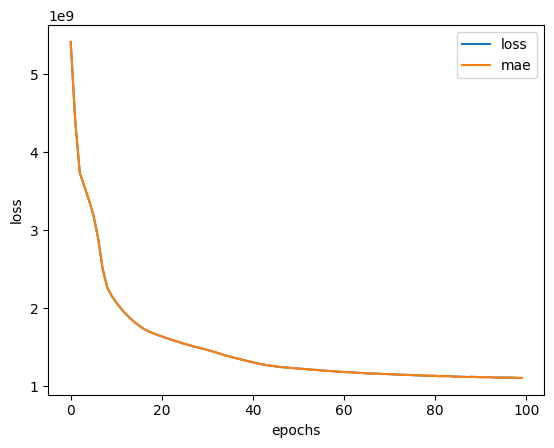

In [23]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')